In [36]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

In [37]:
# IMPORTAR LA DATA DE ENTRENAMIENTO
data_train = pd.read_csv('../data/processed/data_train.csv')

In [38]:
data_train.columns

Index(['ID', 'EDAD', 'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS',
       'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC',
       'TIPO_CONTACTO_WOE', 'TRABAJO_WOE', 'ACEPTACION'],
      dtype='object')

In [39]:
model_result = pd.DataFrame(columns=['Modelo','ROC_AUC','Gini'])

In [40]:
X, y = data_train.iloc[:,1:-1], data_train.ACEPTACION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
# X_test = data_test.iloc[:,1:]

1. REGRESIÓN LOGÍSTICA

In [41]:
# Regresión logística
modelo_logist = LogisticRegression()
modelo_logist.fit(X_train, y_train)

y_pred_logist = modelo_logist.predict_proba(X_val)[:, 1]
roc_auc_logist = roc_auc_score(y_val, y_pred_logist)
fpr_logist, tpr_logist, _ = roc_curve(y_val, y_pred_logist)
gini_logist = roc_auc_logist * 2 - 1
model_result.loc[len(model_result)] = ['Regression Logistic',roc_auc_logist,gini_logist]

print(f"roc_auc: {round(roc_auc_logist, 3)}")
print(f"gini: {round(gini_logist, 3)}")

roc_auc: 0.769
gini: 0.539


c:\Users\AAMR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


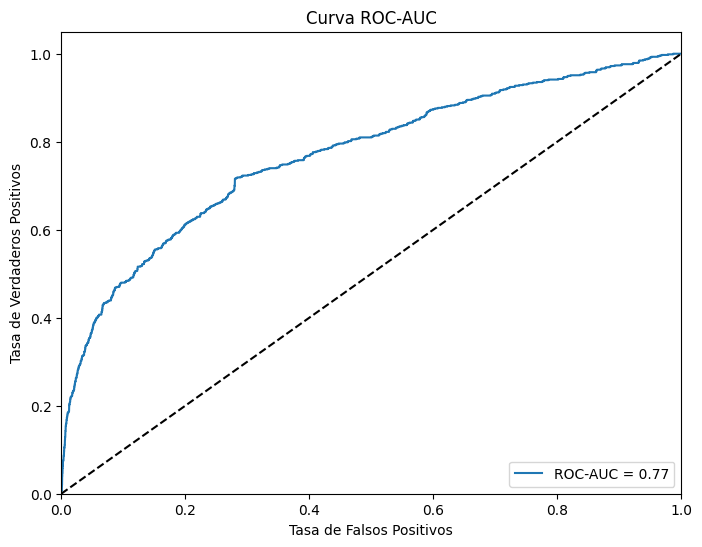

In [42]:
# grafico ROC_AUC para el modelo de Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_logist, tpr_logist, label=f'ROC-AUC = {roc_auc_logist:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

2. RANDOM FOREST

In [43]:
# Randon Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict_proba(X_val)[:, 1]
roc_auc_rf = roc_auc_score(y_val, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf)
gini_rf = roc_auc_rf * 2 - 1
model_result.loc[len(model_result)] = ['Random Forest',roc_auc_rf,gini_rf]

print(f"roc_auc: {round(roc_auc_rf, 3)}")
print(f"gini: {round(gini_rf, 3)}")

roc_auc: 0.778
gini: 0.555


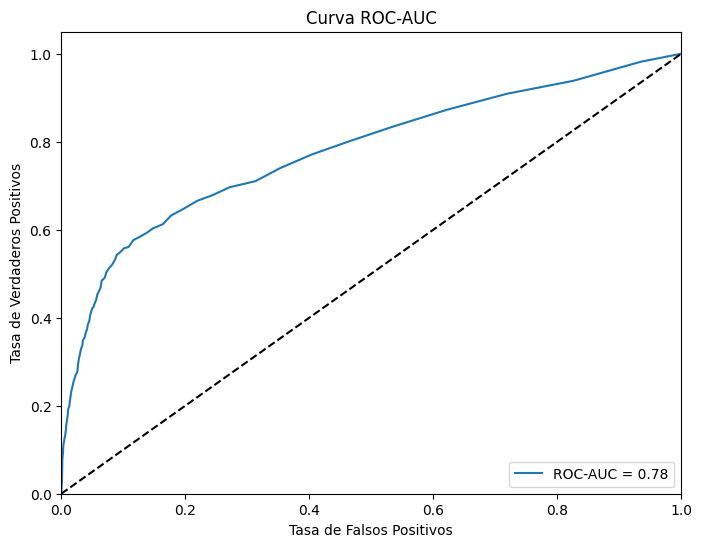

In [44]:
# grafico ROC_AUC para el modelo Randon Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC-AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

3. SUPPORT VECTOR MACHINE

In [45]:
# Support vector machine
modelo_svm = SVC(probability = True)
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict_proba(X_val)[:, 1]
roc_auc_svm = roc_auc_score(y_val, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_pred_svm)
gini_svm = roc_auc_svm * 2 - 1
model_result.loc[len(model_result)] = ['Support Vector Machine',roc_auc_svm,gini_svm]

print(f"roc_auc: {round(roc_auc_svm, 3)}")
print(f"gini: {round(gini_svm, 3)}")

roc_auc: 0.693
gini: 0.386


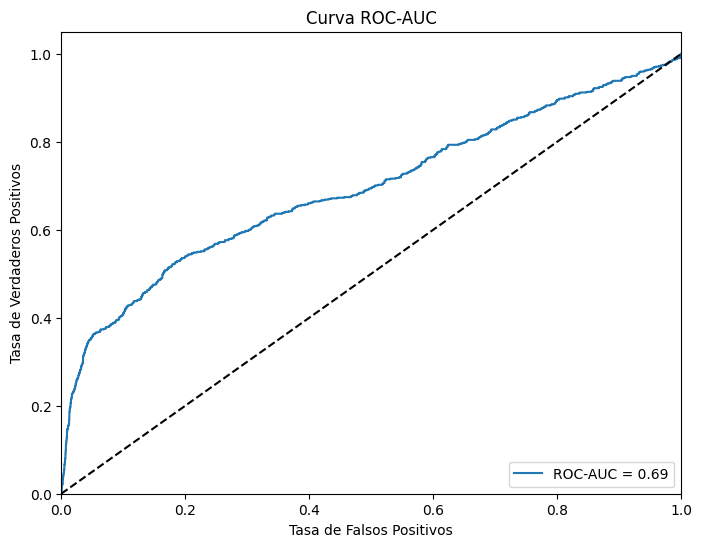

In [46]:
# grafico ROC_AUC para el modelo Support vector machine
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'ROC-AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

4. ÁRBOLES DE DECISIÓN

In [47]:
# Arboles de decisión
modelo_dtc = DecisionTreeClassifier()
modelo_dtc.fit(X_train, y_train)

y_pred_dtc = modelo_dtc.predict_proba(X_val)[:, 1]
roc_auc_dtc = roc_auc_score(y_val, y_pred_dtc)
fpr_dtc, tpr_dtc, _ = roc_curve(y_val, y_pred_dtc)
gini_dtc = roc_auc_dtc * 2 - 1
model_result.loc[len(model_result)] = ['Árboles de Decisión',roc_auc_dtc,gini_dtc]

print(f"roc_auc: {round(roc_auc_dtc, 3)}")
print(f"gini: {round(gini_dtc, 3)}")

roc_auc: 0.64
gini: 0.279


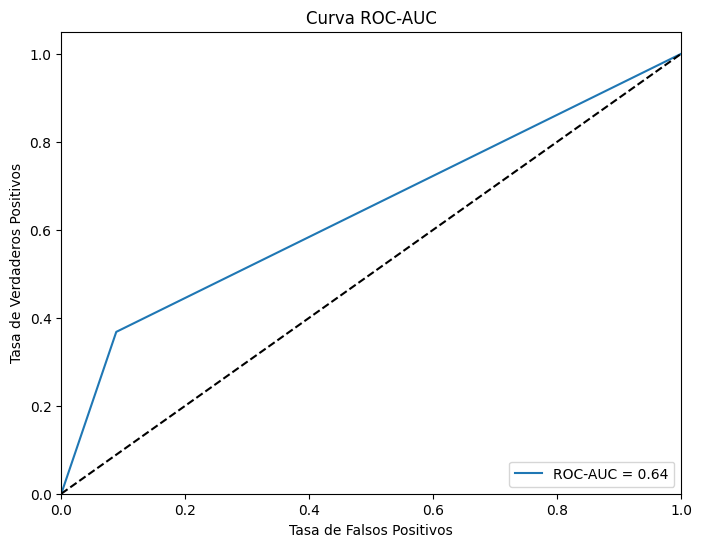

In [48]:
# grafico ROC_AUC para el modelo Arboles de decisión
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label=f'ROC-AUC = {roc_auc_dtc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

5. LIGHTGBM

In [49]:
# modelo lightgbm
modelo_lgb = lgb.LGBMClassifier()
modelo_lgb.fit(X_train, y_train)

y_pred_lgb = modelo_lgb.predict_proba(X_val)[:, 1]
roc_auc_lgb = roc_auc_score(y_val, y_pred_lgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_pred_lgb)
gini_lgb = roc_auc_lgb * 2 - 1
model_result.loc[len(model_result)] = ['LightGBM',roc_auc_lgb,gini_lgb]

print(f"roc_auc: {round(roc_auc_lgb, 3)}")
print(f"gini: {round(gini_lgb, 3)}")

[LightGBM] [Info] Number of positive: 2819, number of negative: 22363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 25182, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111945 -> initscore=-2.071026
[LightGBM] [Info] Start training from score -2.071026
roc_auc: 0.792
gini: 0.583


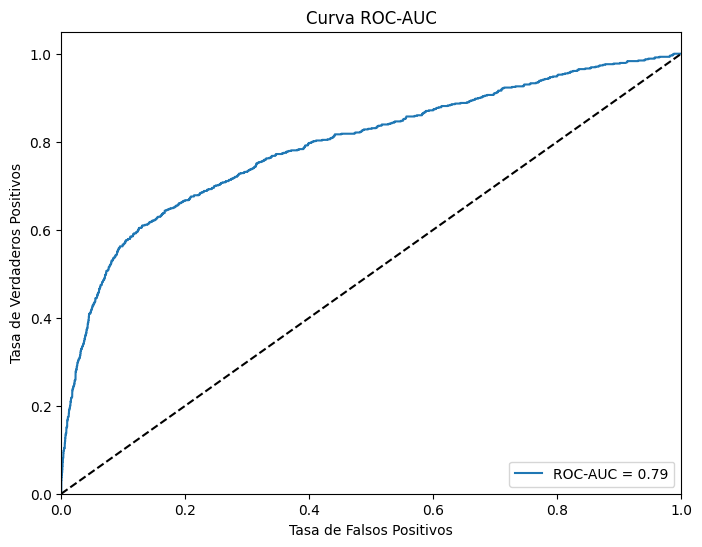

In [50]:
# grafico ROC_AUC para el modelo Lightgbm
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC-AUC = {roc_auc_lgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [51]:
model_result

,Modelo,ROC_AUC,Gini
0,Regression Logistic,0.769432,0.538864
1,Random Forest,0.777651,0.555302
2,Support Vector Machine,0.692777,0.385553
3,Árboles de Decisión,0.639569,0.279138
4,LightGBM,0.791536,0.583072


EXPORTAR MODELOS

In [52]:
import pickle

modelo_logist_deploy = LogisticRegression()
modelo_logist_deploy.fit(X, y)

modelo_rf_deploy = RandomForestClassifier()
modelo_rf_deploy.fit(X, y)

modelo_svm_deploy = SVC(probability = True)
modelo_svm_deploy.fit(X, y)

modelo_dtc_deploy = DecisionTreeClassifier()
modelo_dtc_deploy.fit(X, y)

modelo_lgb_deploy = lgb.LGBMClassifier()
modelo_lgb_deploy.fit(X, y)

pickle.dump(modelo_logist_deploy, open("../model/modelo_regresion_logist.pkl", "wb"))
pickle.dump(modelo_rf_deploy, open("../model/modelo_randon_forest.pkl", "wb"))
pickle.dump(modelo_svm_deploy, open("../model/modelo_support_vector_machine.pkl", "wb"))
pickle.dump(modelo_dtc_deploy, open("../model/modelo_arboles_de_decision.pkl", "wb"))
pickle.dump(modelo_lgb_deploy, open("../model/modelo_lightgbm.pkl", "wb"))

c:\Users\AAMR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 3534, number of negative: 27944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 31478, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112269 -> initscore=-2.067772
[LightGBM] [Info] Start training from score -2.067772
